In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Função de remoção de outliers

In [3]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices


# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)

def outliers_index_l(df):
    index_list = []
    for feature in ["Preço", "TotalReviews"]:
        index_list.extend(outliers_indexes(df, feature))
    outliers_index_list = outliers_indexes(df, 'Preço')
    print("Quantidade de outliers: ",len(outliers_index_list))
    
    return outliers_index_list
    
    
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df

# Dados amazon

In [4]:
dados_amazon = pd.read_csv('amazon/output/dados_amazon.csv')
dados_amazon_new = pd.read_csv('amazon/output/dados_amazon.csv').drop(columns=['Estrelas','Url'])

# Dados Americanas

In [39]:
dados_americanas = pd.read_csv('americanas/output/dados_completos_americanas.csv',sep=';')
dados_americanas_new = dados_americanas.drop(columns=['Modelo','Url'])
dados_americanas_new['Categoria'].loc[dados_americanas_new['Categoria'] == 'Televisão'] = 'TV'
dados_americanas_new.query("Categoria == 'TV'")

,Descrição,TotalReviews,Preço,Loja,Categoria
491,Samsung Smart TV LED 40'' Tizen FHD 40T5300 20...,656,2199.99,Americanas,TV
492,Smart TV LED 43'' Full HD Philco PTV43E10N5SF ...,210,1899.99,Americanas,TV
493,Smart TV LED 32'' Samsung Tizen HD 32T4300 202...,839,1599.99,Americanas,TV
494,"Smart TV LG 32"" HD 32LM627B Wi-Fi Bluetooth HD...",56,1599.99,Americanas,TV
495,"Smart TV LED 32"" Philco PTV32G52S HD e Áudio D...",0,1399.99,Americanas,TV
...,...,...,...,...,...
712,"Smart TV 75"" UHD 4K Samsung 75AU7700, Processa...",0,7998.75,Americanas,TV
713,Smart TV 4K LG oled 65 com Inteligência Artifi...,0,9093.93,Americanas,TV
714,"Samsung Smart TV 55' Neo qled 4K 55QN85A, Mini...",0,8025.29,Americanas,TV
715,"Smart TV Samsung qled 4K 65, Slim Frame, com M...",0,8199.84,Americanas,TV


# Dados Casas Bahia

In [42]:
dados_casas_bahia = pd.read_csv('casas_bahia/output/dados_casas_bahia.csv', sep=';')
dados_casas_bahia_new = dados_casas_bahia.drop(columns=['Estrelas'])
dados_casas_bahia_new['Categoria'].loc[dados_casas_bahia_new['Categoria'] == 'Smart TV'] = 'TV'
dados_casas_bahia_new.query("Categoria == 'TV'")

D:\Programas\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Descrição,TotalReviews,Preço,Loja,Categoria
256,Smart TV LED 42” Full HD Philco PTV42G70N5CF c...,1449,1896.00,Casas Bahia,TV
257,"Smart TV LED 32"" HD Philco PTV32D10N5SKH com D...",485,1499.00,Casas Bahia,TV
258,"Smart TV LED 43"" Full HD TCL 43S6500FS Android...",3407,1999.00,Casas Bahia,TV
259,"Smart TV LED 32"" HD Samsung T4300 com HDR, Sis...",2882,1599.00,Casas Bahia,TV
260,"Smart TV LED 58"" UHD 4K Philco PTV58F80SNS com...",969,3499.00,Casas Bahia,TV
...,...,...,...,...,...
519,"Smart TV Led Panasonic 50"" 4K Ultra HD com Com...",0,1952.99,Casas Bahia,TV
520,"Smart TV OLED 55"" LG OLED55CXPSA 4K HDR com Wi...",0,3512.90,Casas Bahia,TV
521,"Smart TV Philco 55"" PTV55F62SN 4K LED",0,12499.00,Casas Bahia,TV
522,Smart Tv 24Tl520s Lg 24``,0,2299.90,Casas Bahia,TV


In [11]:
dados_casas_bahia_new["Categoria"]

0        Notebook
1        Notebook
2        Notebook
3        Notebook
4        Notebook
          ...    
1046    Geladeira
1047    Geladeira
1048    Geladeira
1049    Geladeira
1050    Geladeira
Name: Categoria, Length: 1051, dtype: object

In [44]:
outliers_index_list_cb = outliers_index_l(dados_casas_bahia_new)
df_clean_cb = remove_outliers(dados_casas_bahia_new, outliers_index_list_cb)

Quantidade de outliers:  55


# Dados Magazine Luiz

In [43]:
dados_ml = pd.read_csv('magazine_luiza/output/dados_magazine_luiza.csv',sep=';')
dados_ml_new = dados_ml.drop(columns=['Estrelas','URL'])
dados_ml_new['Categoria'].loc[dados_ml_new['Categoria'] == 'Smart TV'] = 'TV'
dados_ml_new.query("Categoria == 'TV'")

D:\Programas\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Descrição,Preço,TotalReviews,Loja,Categoria
267,Smart TV 50” Crystal 4K Samsung 50AU7700,3099.00,28,Megazine Luiza,TV
268,Smart TV 65” Crystal 4K Samsung 65AU7700 Wi-Fi,4199.00,3,Megazine Luiza,TV
269,Smart TV 55” Crystal 4K Samsung 55AU7700,3299.00,2,Megazine Luiza,TV
270,Smart TV 60” Crystal 4K Samsung 60AU8000 Wi-Fi,3989.05,3,Megazine Luiza,TV
271,Smart TV 32” HD LED TCL S615 VA 60Hz,1398.00,4,Megazine Luiza,TV
...,...,...,...,...,...
524,Smart Tv 40S615 40 Polegadas Led Full Hd Hdr W...,2126.91,0,Megazine Luiza,TV
525,Smart TV LED 32'' HD LG 32LM627B 2021 WiFi Blu...,1859.07,0,Megazine Luiza,TV
526,"Smart TV Samsung Crystal UHD TU8000 4K 82"", Bo...",8799.00,2,Megazine Luiza,TV
527,"Smart TV Samsung 32"" LED HD UN32T4300",1699.00,2,Megazine Luiza,TV


# Dataframe Geral

In [99]:
dados_gerais = pd.concat([dados_amazon_new, dados_americanas_new,df_clean_cb,dados_ml_new])
dados_gerais.reset_index(drop=True, inplace=True)
dados_gerais['Loja'].loc[dados_gerais['Loja'] == 'Megazine Luiza'] = 'Magazine Luiza'
dados_gerais

D:\Programas\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
3986,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Magazine Luiza,Geladeira
3987,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Magazine Luiza,Geladeira
3988,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Magazine Luiza,Geladeira
3989,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Magazine Luiza,Geladeira


In [100]:
dados_gerais.to_csv('output_geral/dataset_geral.csv',sep=';',index=False)

In [101]:
dados_gerais_marcas = dados_gerais.copy()
dados_gerais_marcas

,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
3986,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Magazine Luiza,Geladeira
3987,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Magazine Luiza,Geladeira
3988,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Magazine Luiza,Geladeira
3989,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Magazine Luiza,Geladeira


In [102]:
modelos = ["lenovo", "positivo", "samsung", "dell", "acer", "apple", "xiaomi", "motorola", "asus","sony","tcl","philips","lg","philco" ]
count = 0
dados_gerais_marcas["Marca"] = np.NaN

for index, row in dados_gerais_marcas.iterrows():
    for modelo in modelos:
        if modelo in row["Descrição"].lower():
            dados_gerais_marcas.loc[index, "Marca"] = modelo.capitalize()

In [103]:
dados_gerais_marcas.dropna(inplace=True)
dados_gerais_marcas.reset_index(drop=True, inplace=True)
dados_gerais_marcas

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook,Lenovo
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook,Lenovo
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook,Samsung
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook,Samsung
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook,Positivo
...,...,...,...,...,...,...
2547,Geladeira/Refrigerador Inverter 554 Litros Phi...,5264.86,0.0,Magazine Luiza,Geladeira,Philco
2548,Geladeira French Door Eco Inverter Philco Fros...,3952.93,0.0,Magazine Luiza,Geladeira,Philco
2549,Geladeira/Refrigerador Philco Frost Free,7884.05,2.0,Magazine Luiza,Geladeira,Philco
2550,Geladeira/Refrigerador Smart LG Side by Side,17669.05,0.0,Magazine Luiza,Geladeira,Lg


In [104]:
dados_gerais_marcas.to_csv('output_geral/dataset_geral_marcas.csv',sep=';',index=False)

D:\Programas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Programas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Programas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<Figure size 1152x648 with 0 Axes>

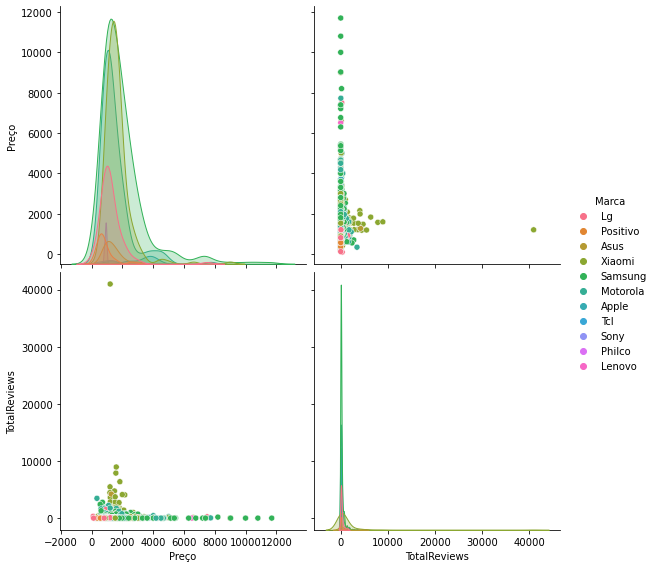

In [105]:
fig = plt.figure(figsize=(16,9))
sns.pairplot(data=dados_gerais_marcas.query("Categoria == 'Smartphone'"), hue="Marca",height=4);

In [106]:
dados_gerais_notebooks = dados_gerais_marcas[dados_gerais_marcas["Categoria"] == "Notebook"]

In [107]:
dados_gerais_notebooks.shape

(854, 6)

In [108]:
!pip install bokeh



In [109]:
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap


In [110]:
dados_gerais_notebooks["Loja"].value_counts().index.tolist()

['Americanas', 'Casas Bahia', 'Magazine Luiza', 'Amazon']

In [111]:
dados_gerais_notebooks.head()

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook,Lenovo
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook,Lenovo
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook,Samsung
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook,Samsung
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook,Positivo


In [112]:
dados_gerais_notebooks["Marca"].value_counts().index.tolist()

['Dell', 'Acer', 'Lenovo', 'Samsung', 'Positivo', 'Asus', 'Apple', 'Lg']

In [113]:
import plotly.express as px


fig = px.bar(dados_gerais_notebooks, x="Loja",  color="Marca", title="Long-Form Input")
fig.show()

In [114]:
dados_gerais_smartphone = dados_gerais_marcas[dados_gerais_marcas["Categoria"] == "Smartphone"]

In [115]:
fig = px.bar(dados_gerais_smartphone, x="Loja",  color="Marca", title="HEY", facet_row_spacing=0)
fig.show()

In [116]:
groupby_loja_marca = dados_gerais_smartphone[['Loja','Marca','Descrição']].groupby(['Loja','Marca']).count()
groupby_loja_marca.reset_index(inplace=True)
groupby_loja_marca.rename(columns={'Descrição':'Quantidade'}, inplace=True)
groupby_loja_marca

,Loja,Marca,Quantidade
0,Amazon,Apple,2
1,Amazon,Asus,4
2,Amazon,Lg,12
3,Amazon,Motorola,19
4,Amazon,Positivo,8
5,Amazon,Samsung,37
6,Amazon,Xiaomi,118
7,Americanas,Asus,5
8,Americanas,Lg,31
9,Americanas,Motorola,54


In [117]:
fig = px.bar(groupby_loja_marca, x='Loja',y='Quantidade',  color="Marca", title="Contagem de marcas de Smartphones por loja")
fig.show()

In [118]:
dados_gerais_smartphone

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
166,"Smartphone LG K41S 32GB, RAM de 3GB, Tela de 6...",799.00,1371.0,Amazon,Smartphone,Lg
167,"Smartphone Positivo Q20, 4Gb Ram, 128Gb, Tela ...",799.00,853.0,Amazon,Smartphone,Positivo
168,"Smartphone ASUS Zenfone Max Pro M2, 6GB 64GB, ...",1299.00,452.0,Amazon,Smartphone,Asus
169,Smartphone Xiaomi Redmi 9 India 64GB 4GB RAM T...,1005.90,101.0,Amazon,Smartphone,Xiaomi
170,Smartphone Xiaomi Redmi Note 8 4RAM 64GB Tela ...,1199.00,40979.0,Amazon,Smartphone,Xiaomi
...,...,...,...,...,...,...
2521,Smartphone Samsung Galaxy A20 32GB Preto 4G - ...,1799.00,0.0,Magazine Luiza,Smartphone,Samsung
2522,"Smartphone Xiaomi Redmi 9A, Verde, Tela 6.53"",...",892.05,0.0,Magazine Luiza,Smartphone,Xiaomi
2523,Smartphone LG K22+ 64GB Blue 4G Quad-Core 3GB ...,807.41,0.0,Magazine Luiza,Smartphone,Lg
2524,"Smartphone xiaomi redmi 9c tela 6,53"" 3gb/64gb",1529.99,6.0,Magazine Luiza,Smartphone,Xiaomi


In [119]:
dados_gerais_smartphone[dados_gerais_smartphone["Descrição"].str.contains("32gb")]

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
175,Smartphone Xiaomi Redmi 9a 32gb 2gb Ram 4 Câme...,829.00,96.0,Amazon,Smartphone,Xiaomi
188,Celular Xiaomi Redmi 9A Versão Global 32gb / 2...,829.00,869.0,Amazon,Smartphone,Xiaomi
190,Celular Motorola Moto E6s Cinza Titanium 32gb ...,729.88,76.0,Amazon,Smartphone,Motorola
272,Celular Samsung Galaxy A10s Preto 32gb Android...,990.00,149.0,Amazon,Smartphone,Samsung
295,"Smartphone Samsung Galaxy A01 Core', 32gb, Qua...",916.98,97.0,Amazon,Smartphone,Samsung
296,Celular Motorola Moto E7 Power Azul Metalico 3...,829.00,25.0,Amazon,Smartphone,Motorola
328,Celular Motorola Moto E7 Aquamarine 32gb Tela ...,959.92,4.0,Amazon,Smartphone,Motorola
332,Celular Xiaomi Redmi 9A Versão Global 32gb / 2...,799.00,609.0,Amazon,Smartphone,Xiaomi
356,"Smartphone Motorola E6 Play, 5.5, 32gb, Androi...",749.00,89.0,Amazon,Smartphone,Motorola
897,Celular Xiaomi Redmi 9a 32gb 2gb Ram Versão Gl...,891.00,5.0,Americanas,Smartphone,Xiaomi


In [120]:
dados_gerais_tv = dados_gerais_marcas[dados_gerais_marcas["Categoria"] == "TV"]

In [121]:
dados_gerais_tv.head()

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
366,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,171.0,Amazon,TV,Philips
367,"Smart TV LED 24"" Monitor LG 24TL520S, Wi-Fi, W...",1052.10,7888.0,Amazon,TV,Lg
368,"Smart TV LED 43"" Android TCl 43s6500 Full HD c...",1998.99,2445.0,Amazon,TV,Tcl
369,"2021 Smart TV LG 55"" 4K OLED55C1 120Hz G-Sync ...",5249.00,35.0,Amazon,TV,Lg
370,"Smart TV LED 43"" 4K UHD LG 43UN731C, 3 HDMI, 2...",2083.11,543.0,Amazon,TV,Lg


In [122]:
fig = px.bar(dados_gerais_tv, x="Loja",  color="Marca", title="HEY")
fig.show()

In [123]:
groupby_loja_marca_tv = dados_gerais_tv[['Loja','Marca','Descrição']].groupby(['Loja','Marca']).count()
groupby_loja_marca_tv.reset_index(inplace=True)
groupby_loja_marca_tv.rename(columns={'Descrição':'Quantidade'}, inplace=True)
groupby_loja_marca_tv

,Loja,Marca,Quantidade
0,Amazon,Acer,10
1,Amazon,Dell,3
2,Amazon,Lenovo,1
3,Amazon,Lg,30
4,Amazon,Philco,9
5,Amazon,Philips,8
6,Amazon,Samsung,17
7,Amazon,Tcl,8
8,Amazon,Xiaomi,1
9,Americanas,Lg,86


In [124]:
fig = px.bar(groupby_loja_marca_tv, x='Loja',y='Quantidade',  color="Marca", title="Contagem de marcas de TVs por Loja", facet_row_spacing=0)
fig.show()

In [125]:
dados_gerais_tv[dados_gerais_tv["Descrição"].str.contains("4K")]

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
366,"Smart TV Philips 50PUG7625 4K UHD, P5, HDR10+,...",2399.00,171.0,Amazon,TV,Philips
369,"2021 Smart TV LG 55"" 4K OLED55C1 120Hz G-Sync ...",5249.00,35.0,Amazon,TV,Lg
370,"Smart TV LED 43"" 4K UHD LG 43UN731C, 3 HDMI, 2...",2083.11,543.0,Amazon,TV,Lg
371,Smart TV 4K QLED 55” Ultra HD Samsung,3749.00,0.0,Amazon,TV,Samsung
372,"Smart TV 55"" 4K Samsung UN55TU8000GXZD, Crysta...",3583.48,1248.0,Amazon,TV,Samsung
...,...,...,...,...,...,...
2285,"Smart TV LG 55"" 4K UHD 55UP7550 WiFi Bluetooth...",3509.10,0.0,Magazine Luiza,TV,Lg
2286,Smart TV 4K LED 75” LG 75UN801C0SB.AWZ,6649.05,0.0,Magazine Luiza,TV,Lg
2287,"Smart TV 4K Samsung QLED 55"" com Modo Game, Al...",4199.00,0.0,Magazine Luiza,TV,Samsung
2289,Smart TV Philips 55PUG762578 4K UHD P5 HDR10 B...,2609.10,0.0,Magazine Luiza,TV,Philips


In [126]:
fig = px.bar(dados_gerais_tv[dados_gerais_tv["Descrição"].str.contains("4K")], x="Loja",  color="Marca", title="HEY")
fig.show()